# Confirmed COVID-19 Cases Comparison: The US
Authors: [Mayher Sandhu](https://www.linkedin.com/in/mayher-sandhu/)


Contributors: [Qing (David) Zhang](https://www.linkedin.com/in/qizhang2/) and Michael Wiley

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy


plt.rcParams["figure.figsize"] = (20,10)

## The Data
We pull the data from John Hopkin's to better analyze and plot each respective state. We use a pandas dataframe to store these values to make it easier to parse and analyze the data.

In [2]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
data = pd.read_csv(url)
data.describe()

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
count,3.253000e+03,3253.000000,3251.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,...,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000
mean,8.390300e+07,839.444205,32090.929560,37.183790,-89.174224,0.000307,0.000307,0.000615,0.000615,0.001537,...,103.616662,112.714417,121.801721,131.892714,141.848140,152.637565,161.817092,170.705195,178.365509,186.662465
std,3.292495e+06,18.091158,17825.153176,8.623023,21.438640,0.017533,0.017533,0.024792,0.024792,0.039181,...,1310.807618,1403.943147,1495.546293,1601.278685,1707.470788,1818.035386,1926.460415,2020.996451,2093.176796,2169.400060
min,1.600000e+01,16.000000,60.000000,-14.271000,-170.132000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.401904e+07,840.000000,19038.000000,34.237321,-98.037489,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,8.403005e+07,840.000000,30045.000000,38.147359,-89.825123,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,4.000000,5.000000,5.000000,6.000000,6.000000,7.000000,7.000000,8.000000,8.000000
75%,8.404701e+07,840.000000,47010.000000,41.684463,-82.793570,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.000000,21.000000,23.000000,25.000000,27.000000,29.000000,31.000000,33.000000,36.000000,38.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,1.000000,1.000000,1.000000,1.000000,1.000000,...,67551.000000,72181.000000,76876.000000,81803.000000,87028.000000,92384.000000,98308.000000,103208.000000,106763.000000,110465.000000


getState: get the table of values associated with the state specified

In [3]:
def getState(state):
    StateData = data[data['Province_State']==state]
    return StateData

getStateValues: parse the values for the state, we had to ignore the preceding columns and take the sum of the columns to make sure we get the aggregate of the county values for each state

In [4]:
def getStateValues(stateData):
    DataValues = []
    for column in stateData:
        if column=="UID":
            continue
        elif column=='iso2':
            continue
        elif column=='iso3':
            continue
        elif column=='code3':
            continue
        elif column=='FIPS':
            continue
        elif column=='Admin2':
            continue
        elif column=='Province_State':
            continue
        elif column=='Country_Region':
            continue
        elif column=='Lat':
            continue
        elif column=='Long_':
            continue
        elif column=='Combined_Key':
            continue
        else:
            item = int(stateData[column].sum())
            DataValues.append(item)
    return DataValues

## Texas's Dataset
Let's test these defined functions to gather the confirmed cases for Texas... because I live in Texas

In [5]:
Texas = getState("Texas")

In [6]:
Texas

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
2528,84048001,US,USA,840,48001.0,Anderson,Texas,US,31.815347,-95.653548,...,1,1,2,2,2,3,3,3,3,4
2529,84048003,US,USA,840,48003.0,Andrews,Texas,US,32.304686,-102.637655,...,6,6,10,10,10,11,11,12,12,13
2530,84048005,US,USA,840,48005.0,Angelina,Texas,US,31.254573,-94.609015,...,10,14,14,14,15,16,16,16,16,18
2531,84048007,US,USA,840,48007.0,Aransas,Texas,US,28.105562,-96.999505,...,1,1,2,2,2,2,2,2,2,2
2532,84048009,US,USA,840,48009.0,Archer,Texas,US,33.615700,-98.687546,...,0,0,0,0,0,0,0,0,0,0
2533,84048011,US,USA,840,48011.0,Armstrong,Texas,US,34.965074,-101.357487,...,0,0,0,0,0,0,0,0,0,1
2534,84048013,US,USA,840,48013.0,Atascosa,Texas,US,28.893330,-98.527305,...,2,3,4,5,5,7,8,9,9,9
2535,84048015,US,USA,840,48015.0,Austin,Texas,US,29.885487,-96.277369,...,5,5,6,7,7,8,8,10,11,12
2536,84048017,US,USA,840,48017.0,Bailey,Texas,US,34.068548,-102.829971,...,0,0,0,0,0,0,0,0,0,0
2537,84048019,US,USA,840,48019.0,Bandera,Texas,US,29.746196,-99.245981,...,0,0,0,1,1,2,2,2,2,2


In [7]:
TexasVal = getStateValues(Texas)

In [8]:
print(TexasVal)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 8, 11, 13, 16, 21, 27, 44, 60, 63, 85, 110, 196, 306, 429, 582, 643, 758, 955, 1229, 1563, 1937, 2455, 2792, 3147, 3809, 4355, 5069, 5734, 6567, 7209, 8043, 8925, 9777, 11208, 12105, 13023, 13677, 14275, 15006]


## Total Number of Confirmed Cases
Let's pull and graph the top 10 states with confirmed cases. We did this by executing the query:

    topk(5,sum(confirmed{country="US"}) by (state))

in our [Prometheus](http://api.covid19data.us/) instance.

I also decided to include Texas, California, and Florida as they are the top 3 most populated states in America.

In [9]:
NYVal = getStateValues(getState("New York"))
NJVal = getStateValues(getState("New Jersey"))
MassachusettsVal = getStateValues(getState("Massachusetts"))
MichiganVal = getStateValues(getState("Michigan"))
PennsylvaniaVal = getStateValues(getState("Pennsylvania"))
CaliforniaVal = getStateValues(getState("California"))
FloridaVal = getStateValues(getState("Florida"))

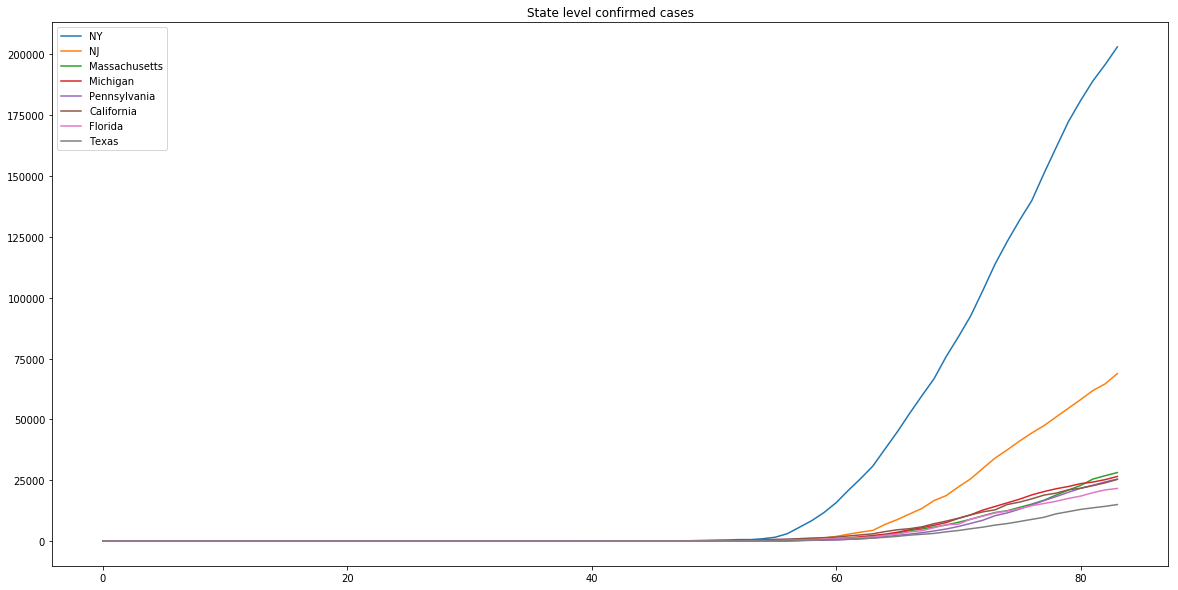

In [12]:
plt.title("State level confirmed cases")
plt.plot(NYVal, label="NY")
plt.plot(NJVal, label="NJ")
plt.plot(MassachusettsVal, label="Massachusetts")
plt.plot(MichiganVal, label="Michigan")
plt.plot(PennsylvaniaVal, label="Pennsylvania")
plt.plot(CaliforniaVal, label="California")
plt.plot(FloridaVal, label="Florida")
plt.plot(TexasVal, label="Texas")
plt.legend()
plt.show()

### Overall totals of confirmed cases for these selected states
New York and New Jersey seem to be the overall leads for the numbers of cases. It's hard to compare such states to the rest of the US as these are more densely populated regions.

## Standardize Values: Per Million
The issue that the above graph illustrated is we have an inaccurate comparison between the states. Each of these states have different populations. We touch on other standardizing techniques explored in the [covid_global notebook](https://github.com/covid19data-us/covid19data.us/blob/master/notebook/covid_global.ipynb) but the one we ultimately decided on is the number of cases per million people.

In [13]:
def stateScale(DataValues, Pop):
    stateScale = []
    scale = Pop/1000000
    for d in DataValues:
        stateScale.append(d/scale)
    return stateScale

In [14]:
NYPop = 8399000
NJPop = 8882000
MassachusettsPop = 6893000
MichiganPop = 9987000
PennsylvaniaPop = 12800000
TexasPop = 29000000
CaliforniaPop = 39512000
FloridaPop = 21477000

NYScale = stateScale(NYVal, NYPop)
NJScale = stateScale(NJVal, NJPop)
MassachusettsScale = stateScale(MassachusettsVal, MassachusettsPop)
MichiganScale = stateScale(MichiganVal, MichiganPop)
PennsylvaniaScale = stateScale(PennsylvaniaVal, PennsylvaniaPop)
TexasScale = stateScale(TexasVal, TexasPop)
CaliforniaScale = stateScale(CaliforniaVal, CaliforniaPop)
FloridaScale = stateScale(FloridaVal, FloridaPop)

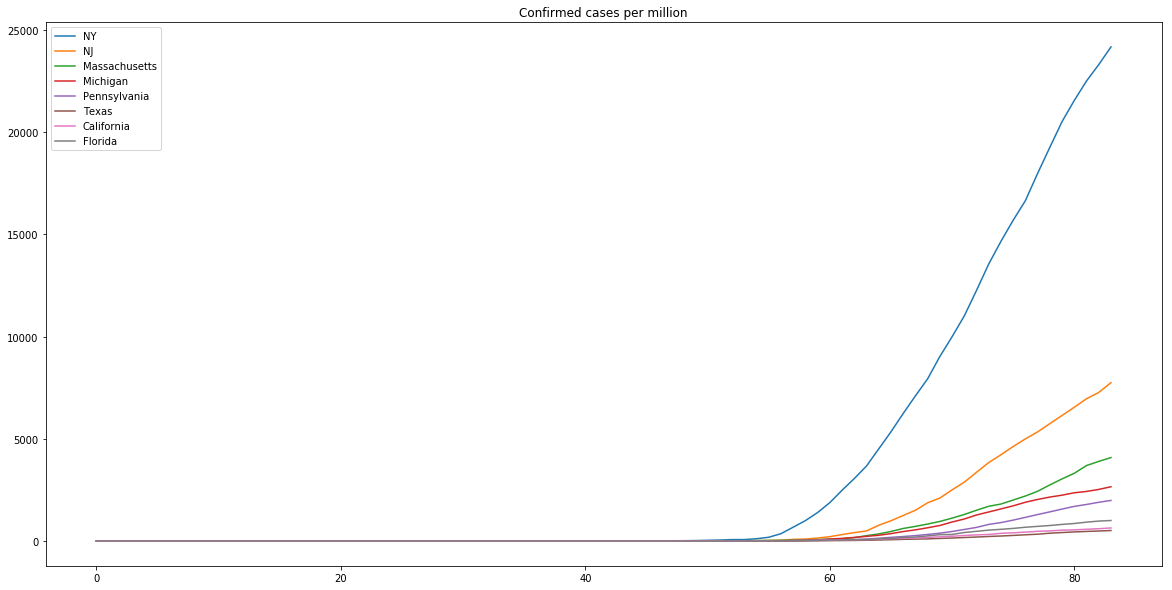

In [15]:
plt.title("Confirmed cases per million")
plt.plot(NYScale, label="NY")
plt.plot(NJScale, label="NJ")
plt.plot(MassachusettsScale, label="Massachusetts")
plt.plot(MichiganScale, label="Michigan")
plt.plot(PennsylvaniaScale, label="Pennsylvania")
plt.plot(TexasScale, label="Texas")
plt.plot(CaliforniaScale, label="California")
plt.plot(FloridaScale, label="Florida")
plt.legend()
plt.show()

Even after this standardization, New York and New Jersey are the leaders in the number of confirmed cases which shows the severity of this situation in this area.

For visualization purposes, let's take a closer look at the other states.

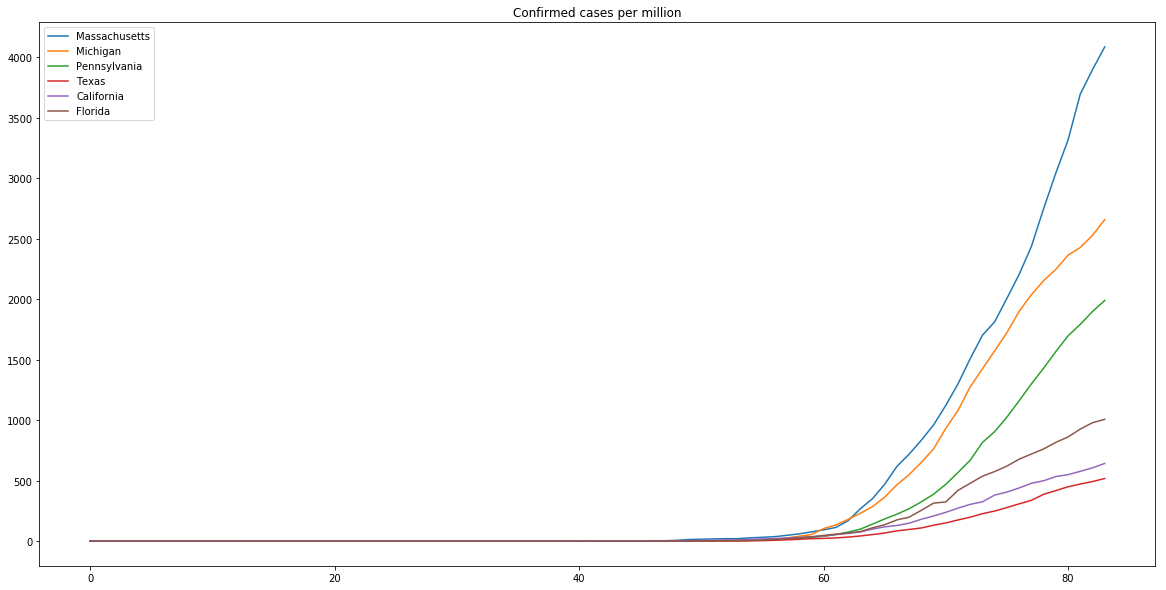

In [16]:
plt.title("Confirmed cases per million")
plt.plot(MassachusettsScale, label="Massachusetts")
plt.plot(MichiganScale, label="Michigan")
plt.plot(PennsylvaniaScale, label="Pennsylvania")
plt.plot(TexasScale, label="Texas")
plt.plot(CaliforniaScale, label="California")
plt.plot(FloridaScale, label="Florida")
plt.legend()
plt.show()

We can see that the 3 most populated states: Texas, Florida, and California, are at the lower end of the numbers. This is due to a number of differenct factors: locking down larger cities, issuing stay-at-home orders, and being naturally more spread out than other states.

# Linear Regression
## Total Number vs Per Million
Let's apply a linear regression to the total number of cases as well as the standardized numbers to analyze the overall rate for New York and New Jersey.

In order to feed these values into the LinearRegression package, we need X values. I just set these as the index values.

I called the fit function to fit the LinearRegression package on the respective state's values. Then I called the predict function to generate the linear functions.

getIndex: generate index values for the respective data set

In [17]:
def getIndex(Data):
    count = 0
    Index = []
    for i in Data:
        Index.append(count)
        count = count+1
    return Index

In [18]:
NYRegressor = LinearRegression()
NYIndex = getIndex(NYVal)

NYRegressor.fit(np.array(NYIndex).reshape(-1,1), np.array(NYVal).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
NJRegressor = LinearRegression()
NJIndex = getIndex(NJVal)

NJRegressor.fit(np.array(NJIndex).reshape(-1,1), np.array(NJVal).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
NYLine = NYRegressor.predict(np.array(NYIndex).reshape(-1,1))
NJLine = NJRegressor.predict(np.array(NJIndex).reshape(-1,1))

In [21]:
NYScaleRegressor = LinearRegression()
NYScaleIndex = getIndex(NYScale)

NYScaleRegressor.fit(np.array(NYScaleIndex).reshape(-1,1), np.array(NYScale).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
NJScaleRegressor = LinearRegression()
NJScaleIndex = getIndex(NJScale)

NJScaleRegressor.fit(np.array(NJScaleIndex).reshape(-1,1), np.array(NJScale).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
NYScaleLine = NYScaleRegressor.predict(np.array(NYScaleIndex).reshape(-1,1))
NJScaleLine = NJScaleRegressor.predict(np.array(NJScaleIndex).reshape(-1,1))

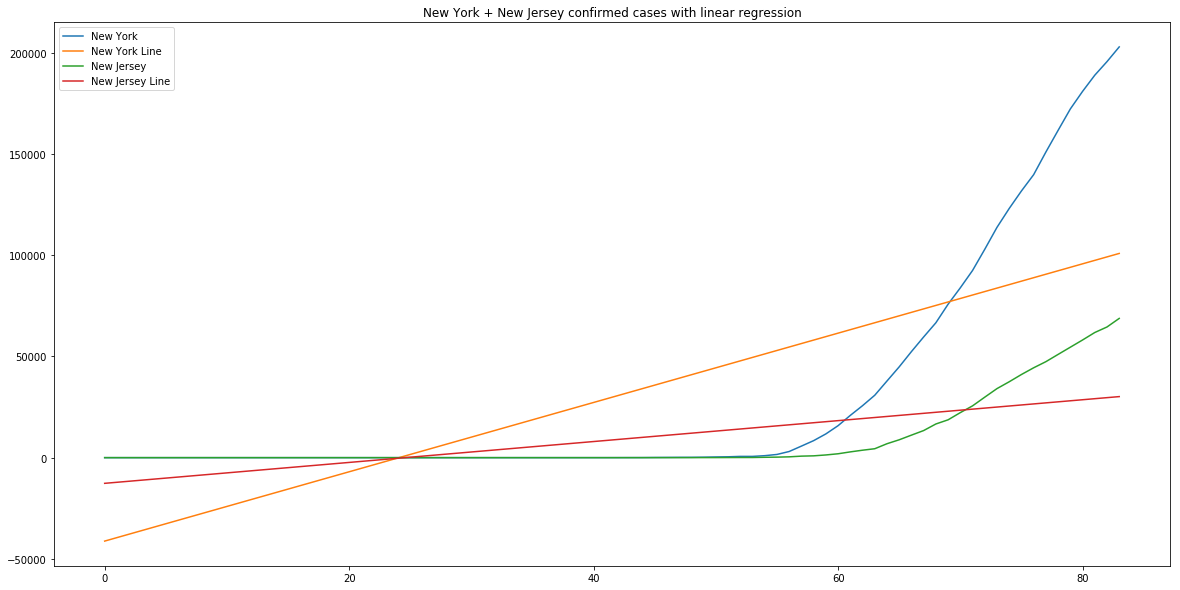

In [24]:
plt.title("New York + New Jersey confirmed cases with linear regression")
plt.plot(NYVal, label="New York")
plt.plot(NYLine, label="New York Line")
plt.plot(NJVal, label="New Jersey")
plt.plot(NJLine, label="New Jersey Line")
plt.legend()
plt.show()

In [25]:
print("New York Slope: ", NYRegressor.coef_)
print("New York Intercept: ", NYRegressor.intercept_)

print("New Jersey Slope: ", NJRegressor.coef_)
print("New Jersey Intercept: ", NJRegressor.intercept_)

New York Slope:  [[1713.06708515]]
New York Intercept:  [-41249.33165266]
New Jersey Slope:  [[516.47447606]]
New Jersey Intercept:  [-12698.33361345]


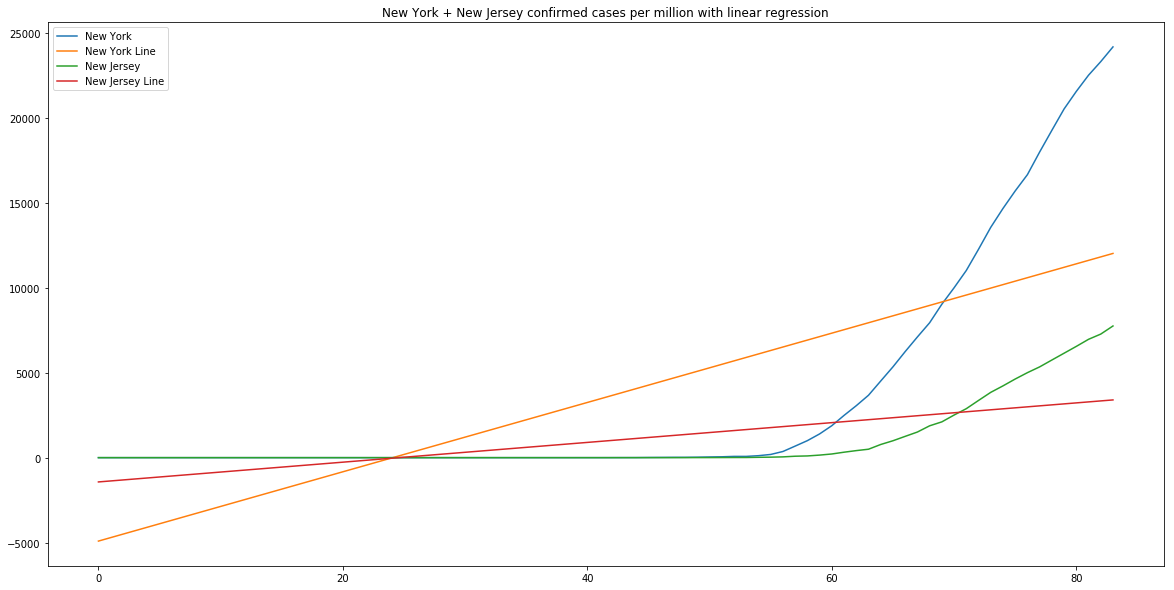

In [26]:
plt.title("New York + New Jersey confirmed cases per million with linear regression")
plt.plot(NYScale, label="New York")
plt.plot(NYScaleLine, label="New York Line")
plt.plot(NJScale, label="New Jersey")
plt.plot(NJScaleLine, label="New Jersey Line")
plt.legend()
plt.show()

In [27]:
print("New York Slope: ", NYScaleRegressor.coef_)
print("New York Intercept: ", NYScaleRegressor.intercept_)

print("New Jersey Slope: ", NJScaleRegressor.coef_)
print("New Jersey Intercept: ", NJScaleRegressor.intercept_)

New York Slope:  [[203.96083881]]
New York Intercept:  [-4911.21938953]
New Jersey Slope:  [[58.1484436]]
New Jersey Intercept:  [-1429.67052617]


We can see in the above graphs that the trend lines are overall the same but the slopes are different. This is because we have a different range of values for each of the graphs but they are overall representing the same information.

# Rate of confirmed cases
Let's calculate the daily difference of the confirmed cases to illustrate the overall trend.

difference: take the current point and subtract it from the previous point to get the daily difference

In [28]:
def difference(DataValues):
    DataDifference = DataValues.copy()
    for i in range(len(DataDifference) -1, 0, -1):
        DataDifference[i] = DataDifference[i] - DataDifference[i-1]
    DataDifference[0] = 0
    return DataDifference

In [29]:
NYDiff = difference(NYVal)
NJDiff = difference(NJVal)
MassachusettsDiff = difference(MassachusettsVal)
MichiganDiff = difference(MichiganVal)
PennsylvaniaDiff = difference(PennsylvaniaVal)
TexasDiff = difference(TexasVal)
CaliforniaDiff = difference(CaliforniaVal)
FloridaDiff = difference(FloridaVal)

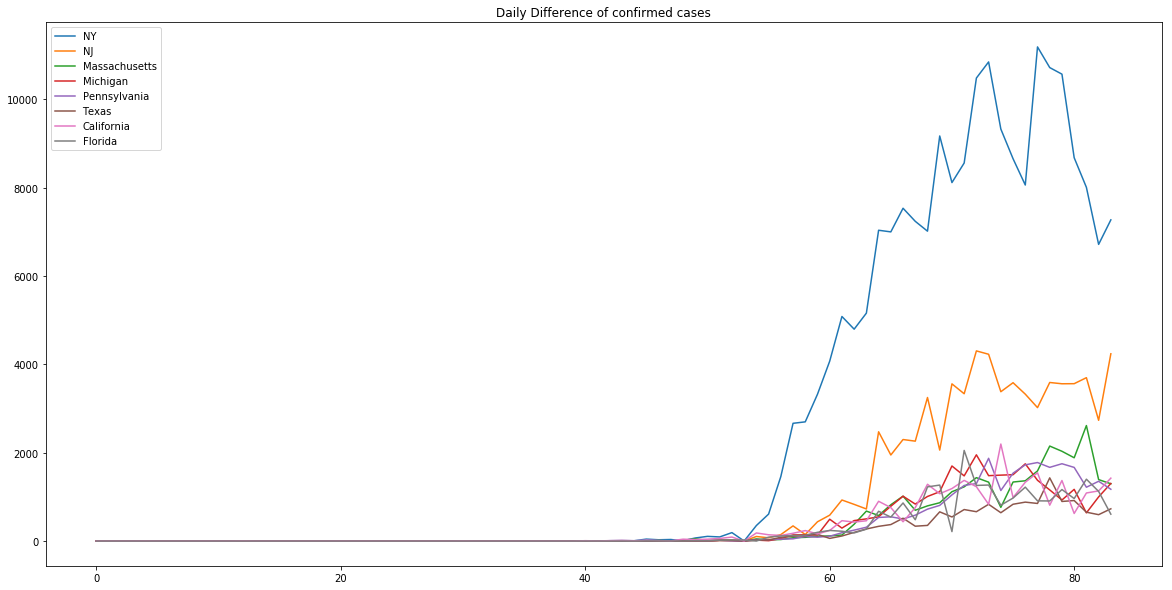

In [30]:
plt.title("Daily Difference of confirmed cases")
plt.plot(NYDiff, label="NY")
plt.plot(NJDiff, label="NJ")
plt.plot(MassachusettsDiff, label="Massachusetts")
plt.plot(MichiganDiff, label="Michigan")
plt.plot(PennsylvaniaDiff, label="Pennsylvania")
plt.plot(TexasDiff, label="Texas")
plt.plot(CaliforniaDiff, label="California")
plt.plot(FloridaDiff, label="Florida")
plt.legend()
plt.show()

While New York has the highest numbers, we can see that more recently their daily rate of cases is slowly decreasing and not severely spiking like it has in the past. It's also interesting to note that New Jersey is following the same visual trend as New York.

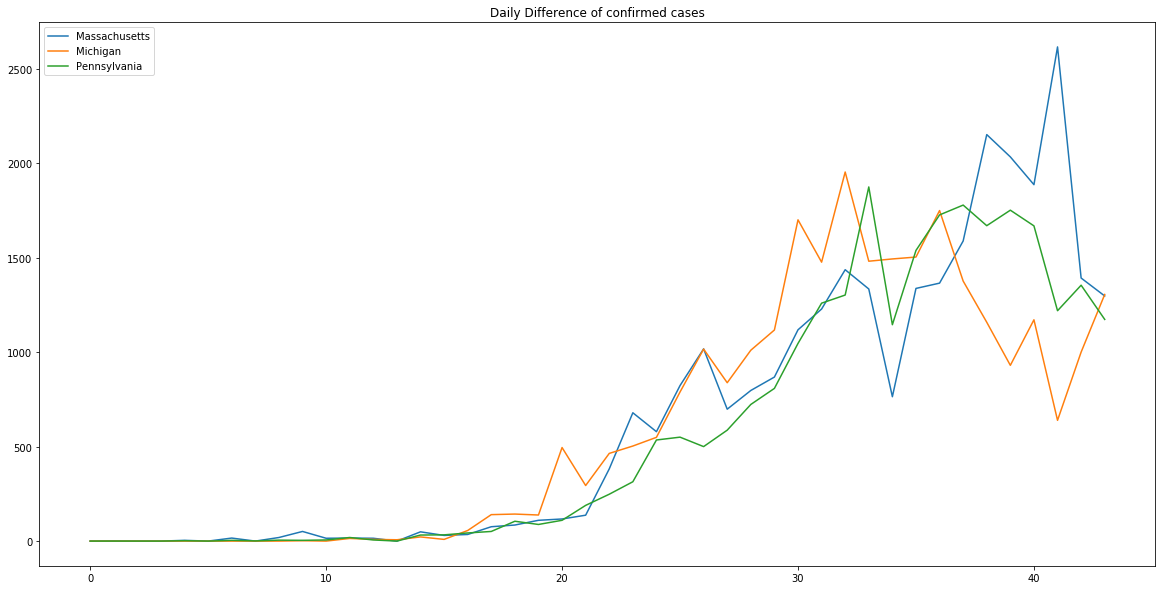

In [31]:
plt.title("Daily Difference of confirmed cases")
plt.plot(MassachusettsDiff[40:], label="Massachusetts")
plt.plot(MichiganDiff[40:], label="Michigan")
plt.plot(PennsylvaniaDiff[40:], label="Pennsylvania")
plt.legend()
plt.show()

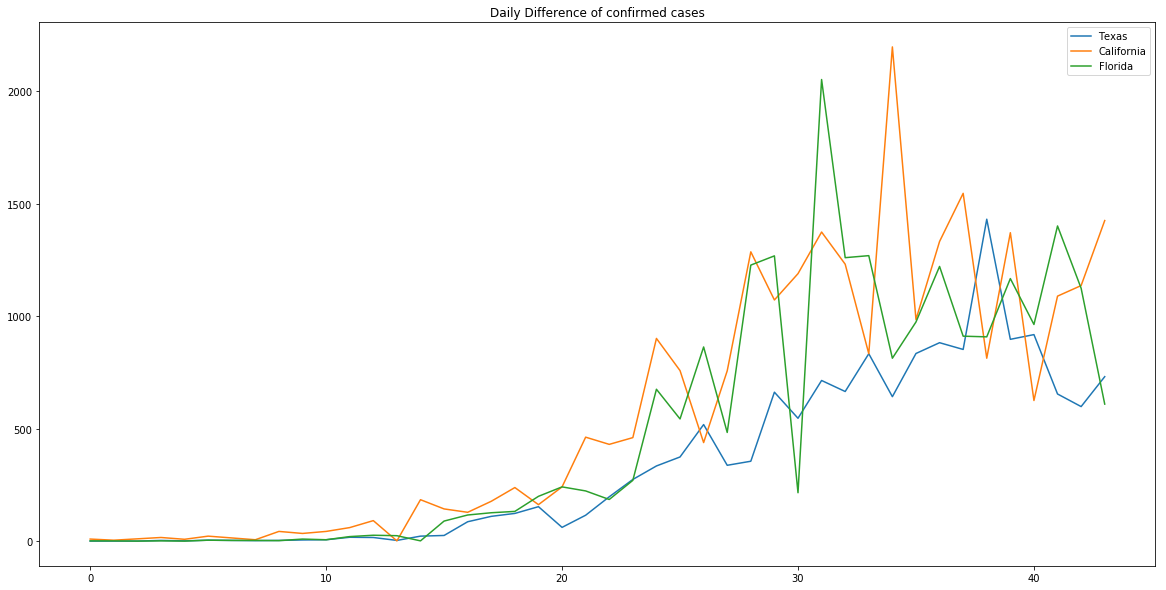

In [32]:
plt.title("Daily Difference of confirmed cases")
plt.plot(TexasDiff[40:], label="Texas")
plt.plot(CaliforniaDiff[40:], label="California")
plt.plot(FloridaDiff[40:], label="Florida")
plt.legend()
plt.show()

Here we can see that the states with lower totals have more of a variation of daily difference of confirmed cases whereas the states with higher totals seem to see a daily increase of the daily difference of confirmed cases.

# Death Rate
Similarly, we pull in the number of deaths into a pandas dataframe and can perform the same calculations that we applied above.

In [33]:
url_death = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
death = pd.read_csv(url_death)
death.describe()

,UID,code3,FIPS,Lat,Long_,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
count,3.253000e+03,3253.000000,3251.000000,3253.000000,3253.000000,3.253000e+03,3253.0,3253.0,3253.0,3253.0,...,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000
mean,8.390300e+07,839.444205,32090.929560,37.183790,-89.174224,1.033565e+05,0.0,0.0,0.0,0.0,...,2.917000,3.314786,3.910544,4.517061,5.065171,5.711958,6.288657,6.767292,7.230249,7.937903
std,3.292495e+06,18.091158,17825.153176,8.623023,21.438640,3.457312e+05,0.0,0.0,0.0,0.0,...,55.045591,62.840388,72.533656,82.727186,93.285134,105.518921,115.480295,125.052295,133.328697,143.621977
min,1.600000e+01,16.000000,60.000000,-14.271000,-170.132000,0.000000e+00,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.401904e+07,840.000000,19038.000000,34.237321,-98.037489,9.832000e+03,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.403005e+07,840.000000,30045.000000,38.147359,-89.825123,2.465800e+04,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.404701e+07,840.000000,47010.000000,41.684463,-82.793570,6.655100e+04,0.0,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,1.003911e+07,0.0,0.0,0.0,0.0,...,3048.000000,3485.000000,4009.000000,4571.000000,5150.000000,5820.000000,6367.000000,6898.000000,7349.000000,7905.000000


This particular dataset has the population per state. I had to modify my functions defined earlier to account for this extra column but also to read in this population number as it is used in scaling the data.

In [34]:
def getStateDeath(state):
    StateDeath = death[death['Province_State']==state]
    return StateDeath

In [35]:
def getStateDeathValues(stateData):
    DataValues = []
    for column in stateData:
        if column=="UID":
            continue
        elif column=='iso2':
            continue
        elif column=='iso3':
            continue
        elif column=='code3':
            continue
        elif column=='FIPS':
            continue
        elif column=='Admin2':
            continue
        elif column=='Province_State':
            continue
        elif column=='Country_Region':
            continue
        elif column=='Lat':
            continue
        elif column=='Long_':
            continue
        elif column=='Combined_Key':
            continue
        elif column=='Population':
            statePop = int(stateData[column].sum())
        else:
            item = int(stateData[column].sum())
            DataValues.append(item)
    return DataValues, statePop

In [36]:
TexasDeath = getStateDeath("Texas")

In [37]:
TexasDeath

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
2528,84048001,US,USA,840,48001.0,Anderson,Texas,US,31.815347,-95.653548,...,0,0,0,0,0,0,0,0,0,0
2529,84048003,US,USA,840,48003.0,Andrews,Texas,US,32.304686,-102.637655,...,0,0,0,0,0,0,0,0,0,0
2530,84048005,US,USA,840,48005.0,Angelina,Texas,US,31.254573,-94.609015,...,0,0,0,0,0,0,0,0,0,0
2531,84048007,US,USA,840,48007.0,Aransas,Texas,US,28.105562,-96.999505,...,0,0,0,0,0,0,0,0,0,0
2532,84048009,US,USA,840,48009.0,Archer,Texas,US,33.615700,-98.687546,...,0,0,0,0,0,0,0,0,0,0
2533,84048011,US,USA,840,48011.0,Armstrong,Texas,US,34.965074,-101.357487,...,0,0,0,0,0,0,0,0,0,0
2534,84048013,US,USA,840,48013.0,Atascosa,Texas,US,28.893330,-98.527305,...,0,0,0,0,0,0,0,0,0,0
2535,84048015,US,USA,840,48015.0,Austin,Texas,US,29.885487,-96.277369,...,0,0,0,0,0,0,0,0,0,0
2536,84048017,US,USA,840,48017.0,Bailey,Texas,US,34.068548,-102.829971,...,0,0,0,0,0,0,0,0,0,0
2537,84048019,US,USA,840,48019.0,Bandera,Texas,US,29.746196,-99.245981,...,0,0,0,0,0,0,0,0,0,0


In [38]:
TexasDeathValues, TexasPop = getStateDeathValues(TexasDeath)

In [39]:
print(TexasDeathValues)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 5, 4, 5, 7, 9, 12, 15, 21, 26, 30, 37, 45, 54, 66, 77, 100, 116, 136, 150, 160, 189, 210, 238, 266, 283, 305, 342]


In [40]:
print(TexasPop)

28995881


In [41]:
TexasDeathScale = stateScale(TexasDeathValues, TexasPop)
TexasDeathDiff = difference(TexasDeathValues)

In [42]:
NYDeathVal, NYPop = getStateDeathValues(getStateDeath("New York"))
NJDeathVal, NJPop = getStateDeathValues(getStateDeath("New Jersey"))
MassachusettsDeathVal, MassachusettsPop = getStateDeathValues(getStateDeath("Massachusetts"))
MichiganDeathVal, MichiganPop = getStateDeathValues(getStateDeath("Michigan"))
PennsylvaniaDeathVal, PennsylvaniaPop = getStateDeathValues(getStateDeath("Pennsylvania"))
CaliforniaDeathVal, CaliforniaPop = getStateDeathValues(getStateDeath("California"))
FloridaDeathVal, FloridaPop = getStateDeathValues(getStateDeath("Florida"))

In [43]:
NYDeathScale = stateScale(NYDeathVal, NYPop)
NJDeathScale = stateScale(NJDeathVal, NJPop)
MassachusettsDeathScale = stateScale(MassachusettsDeathVal, MassachusettsPop)
MichiganDeathScale = stateScale(MichiganDeathVal, MichiganPop)
PennsylvaniaDeathScale = stateScale(PennsylvaniaDeathVal, PennsylvaniaPop)
CaliforniaDeathScale = stateScale(CaliforniaDeathVal, CaliforniaPop)
FloridaDeathScale = stateScale(FloridaDeathVal, FloridaPop)

In [44]:
NYDeathDiff = difference(NYDeathVal)
NJDeathDiff = difference(NJDeathVal)
MassachusettsDeathDiff = difference(MassachusettsDeathVal)
MichiganDeathDiff = difference(MichiganDeathVal)
PennsylvaniaDeathDiff = difference(PennsylvaniaDeathVal)
CaliforniaDeathDiff = difference(CaliforniaDeathVal)
FloridaDeathDiff = difference(FloridaDeathVal)

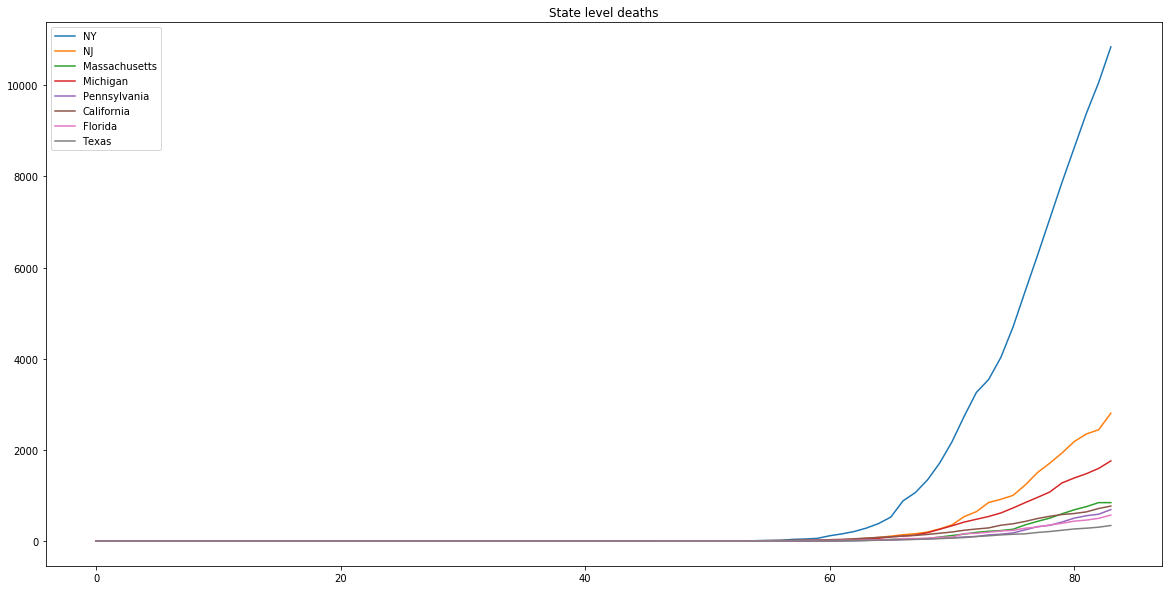

In [45]:
plt.title("State level deaths")
plt.plot(NYDeathVal, label="NY")
plt.plot(NJDeathVal, label="NJ")
plt.plot(MassachusettsDeathVal, label="Massachusetts")
plt.plot(MichiganDeathVal, label="Michigan")
plt.plot(PennsylvaniaDeathVal, label="Pennsylvania")
plt.plot(CaliforniaDeathVal, label="California")
plt.plot(FloridaDeathVal, label="Florida")
plt.plot(TexasDeathValues, label="Texas")
plt.legend()
plt.show()

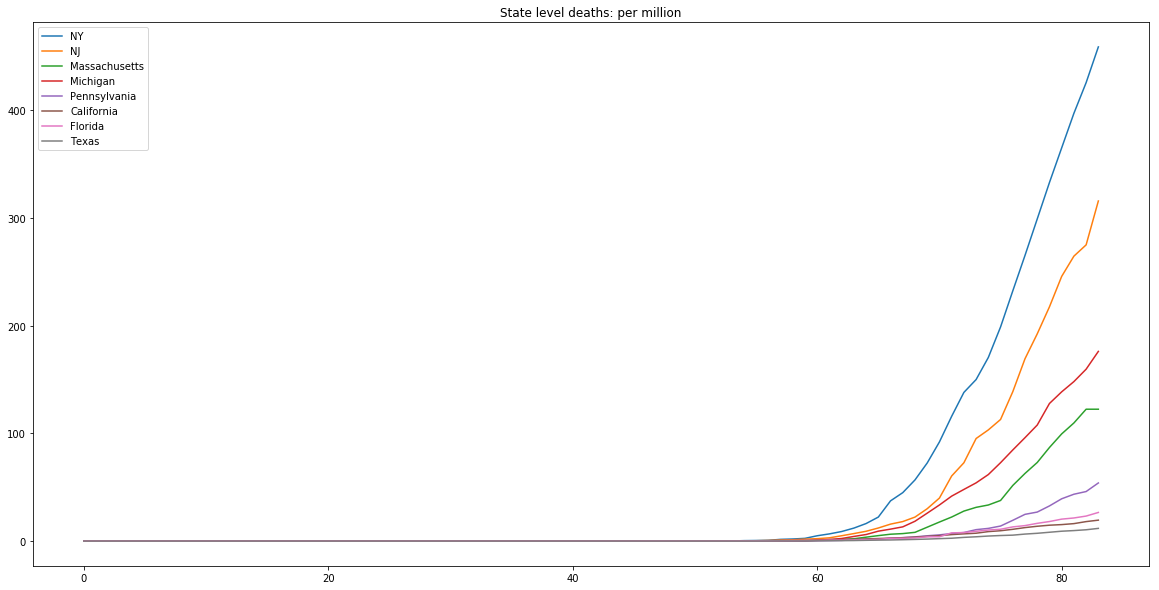

In [46]:
plt.title("State level deaths: per million")
plt.plot(NYDeathScale, label="NY")
plt.plot(NJDeathScale, label="NJ")
plt.plot(MassachusettsDeathScale, label="Massachusetts")
plt.plot(MichiganDeathScale, label="Michigan")
plt.plot(PennsylvaniaDeathScale, label="Pennsylvania")
plt.plot(CaliforniaDeathScale, label="California")
plt.plot(FloridaDeathScale, label="Florida")
plt.plot(TexasDeathScale, label="Texas")
plt.legend()
plt.show()

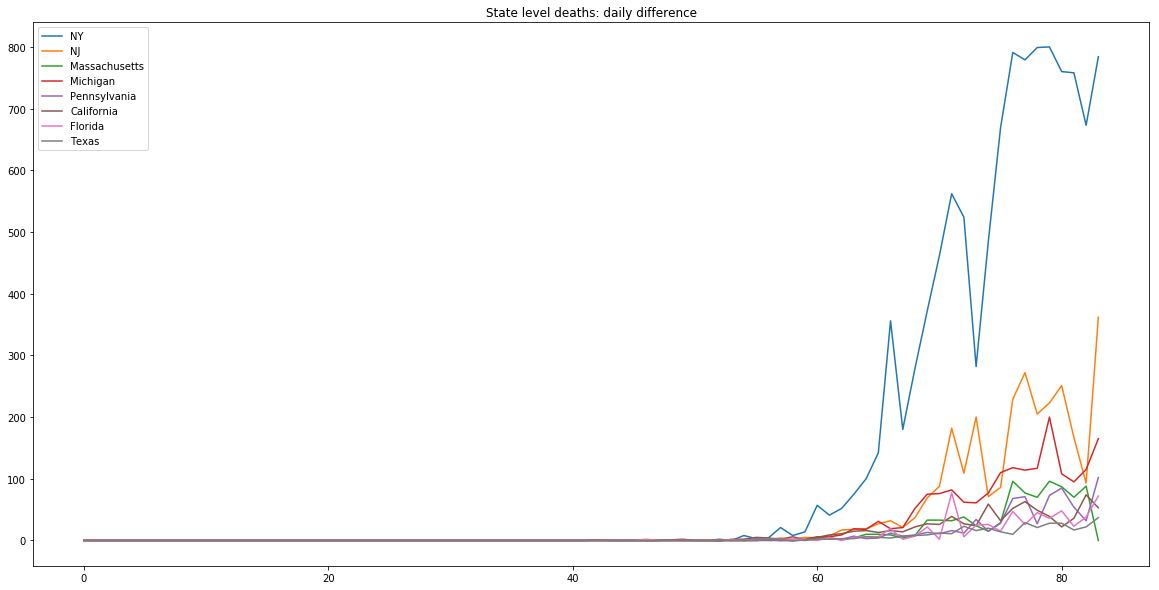

In [47]:
plt.title("State level deaths: daily difference")
plt.plot(NYDeathDiff, label="NY")
plt.plot(NJDeathDiff, label="NJ")
plt.plot(MassachusettsDeathDiff, label="Massachusetts")
plt.plot(MichiganDeathDiff, label="Michigan")
plt.plot(PennsylvaniaDeathDiff, label="Pennsylvania")
plt.plot(CaliforniaDeathDiff, label="California")
plt.plot(FloridaDeathDiff, label="Florida")
plt.plot(TexasDeathDiff, label="Texas")
plt.legend()
plt.show()

We can see that, not surprisingly, there is a direct correlation between the confirmed number of cases per state and the number of deaths per state.

# Findings
- Stay at home policy
    - States issuing a mandatory stay at home policy earlier than other countries helped prevent the rapid spread of COVID-19. We saw a slower of a rate of confirmed cases compared to states who implemented this restriction later. We see this same pattern in the covid_global notebook.
- Experimental drug might be working
    - New York was the hardest hit state in the US. Once the President announced the use of the experimental drug, we saw that the daily difference in the confirmed cases does not increase as high as it was before.
- Scale your data!
    - After applying the scaling function to the data, we were able to more accurately illustrate and compare the confirmed cases and deaths per state. This was a better way to show the overall impact of the spread of COVID compared to looking at the overall numbers.
    
    
### Stay safe, y'all